# Problem set 7 (Alonzo, Arias, Ducco)

We start by generating our data through a non linear data-generating process.

$$ Y_i = \beta_1^{X1_{i}} + \beta_2^{X2_i} + e_i $$


In [2]:
suppressMessages(install.packages("rpart"))
suppressMessages(install.packages("rpart.plot"))
suppressMessages(install.packages("ggplot2"))



suppressMessages(library("rpart"))
suppressMessages(library("rpart.plot"))
suppressMessages(library("ggplot2"))



set.seed(666) #we set a seed so that we could double check our codes

n<-100
mean_x<-0
sd_x<-4
mean_e<-0
sd_e<-1
beta<-c(3,4)


############################


data_gen <- function(n,mean_x,sd_x,mean_e,sd_e,beta){
  X_1<-rnorm(n,mean_x,sd_x)
  X_2<-rnorm(n,mean_x,sd_x)
  e<-rnorm(n,mean_e,sd_e)
  y<- beta[1]^(X_1) + beta[2]^(X_2) + e
  return(data.frame(X_1,X_2,y))
}
# We create a function to generate data






package 'rpart' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Asus\AppData\Local\Temp\RtmpwFYgr9\downloaded_packages
package 'rpart.plot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Asus\AppData\Local\Temp\RtmpwFYgr9\downloaded_packages
package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Asus\AppData\Local\Temp\RtmpwFYgr9\downloaded_packages


Warning message:
"Paket 'rpart' wurde unter R Version 4.1.3 erstellt"
Warning message:
"Paket 'rpart.plot' wurde unter R Version 4.1.3 erstellt"
Warning message:
"Paket 'ggplot2' wurde unter R Version 4.1.3 erstellt"


### 1a Generate the data and fit a regression tree

In [5]:

data<-data_gen(n,mean_x,sd_x,mean_e,sd_e,beta)

tree<-rpart(formula=y ~ .,data=data)

long_tree<-rpart(formula=y~ .,data=data, control=list(cp=0))



$$ \sum_{m = 1}^{|T|} \sum_{x_i\in R_m}(y_i - \hat{y}_{R_m})^2 + \alpha |T| $$

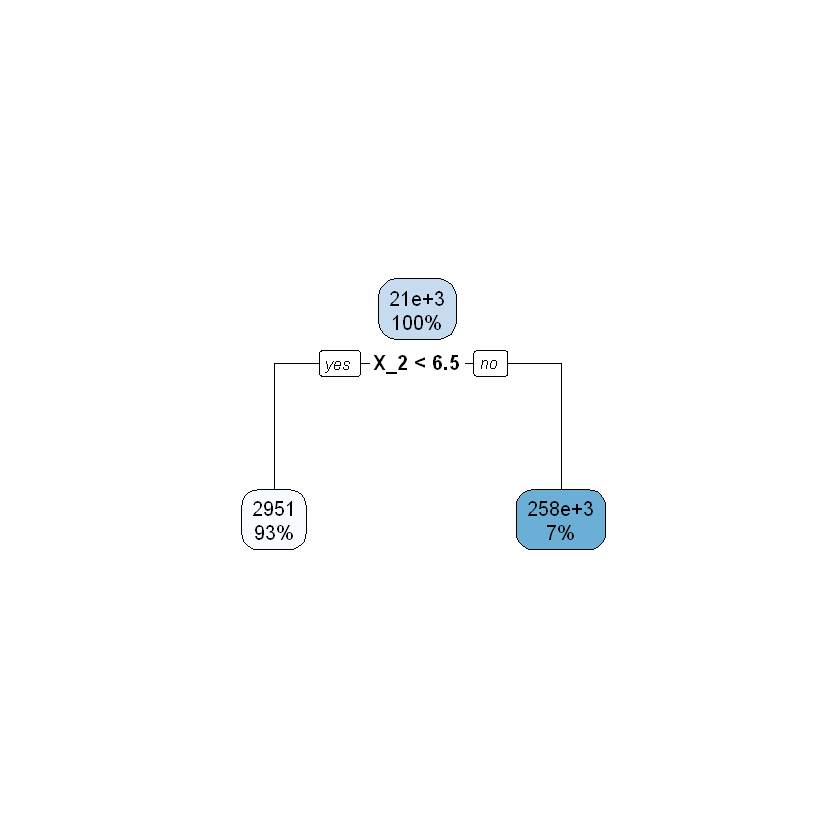

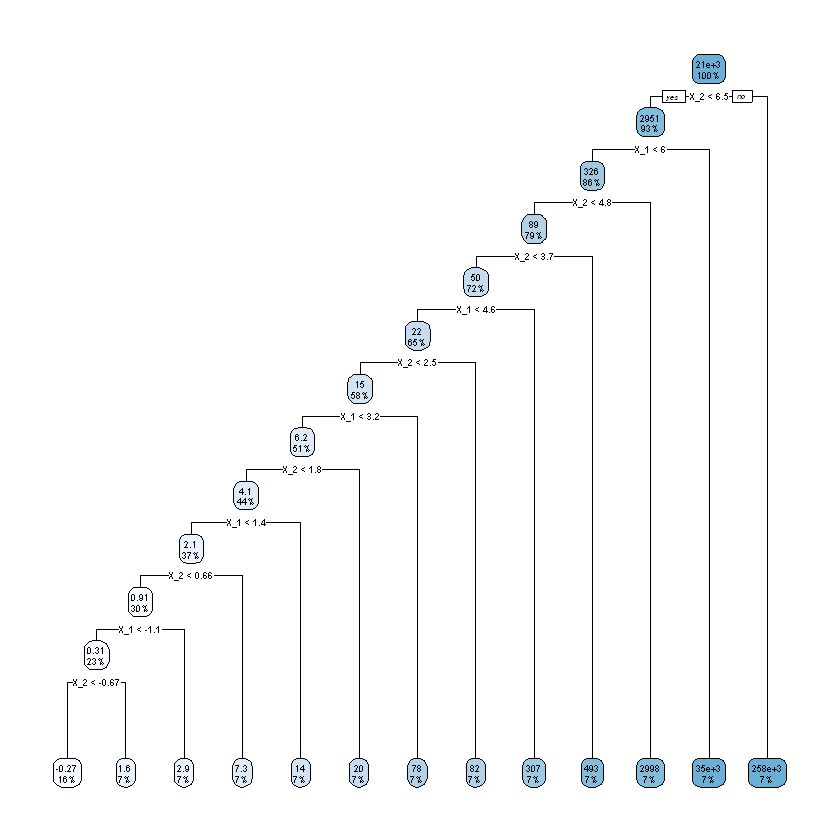

In [6]:
rpart.plot(tree)

rpart.plot(long_tree)

### 1b MSE of a linear regression model, full tree and pruned tree

[1] "mean squared error of linear regression: "


[1] 19287044091

[1] "mean squared error of pruned tree"


[1] 19015487941

[1] "mean squared error of longest tree"


[1] 18212402846

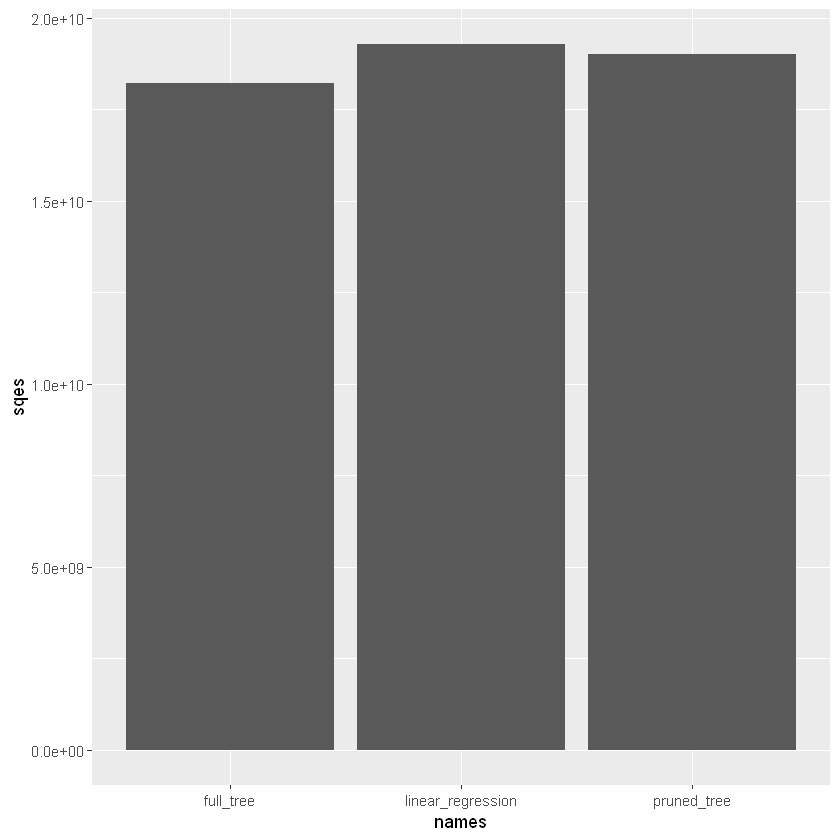

In [7]:

test_set<-data_gen(n,mean_x,sd_x,mean_e,sd_e,beta)


lm_obj<-lm(y~ X_1 +X_2,data=data)


mean_sqe<-function(test,model){
  
  
  y_fit<-predict(model,test)
  return(mean((test$y-y_fit)^2))
  
  }

print("mean squared error of linear regression: ")
mean_sqe(test_set,lm_obj)


print("mean squared error of pruned tree")

mean_sqe(test_set,tree)

print("mean squared error of longest tree")

mean_sqe(test_set,long_tree)

sqes<- c(mean_sqe(test_set,lm_obj),mean_sqe(test_set,tree),mean_sqe(test_set,long_tree))

names<-c("linear_regression",'pruned_tree','full_tree')
MSEE<-data.frame(names,sqes)
p<-ggplot(data=MSEE, aes(x=names, y=sqes)) +
  geom_bar(stat="identity")
p



### 2a A dgp well suited for regression trees

$$
    y_i= 
\begin{cases}
    100 \beta_2 + e_i,  & \text{if } X_{1i} < 1 \\
    -100 \beta_1 + e_i,& \text{if } X_{1i} \geq 1
\end{cases}
$$

[1] "means"


[1] 45473.341  2890.459  2891.081

[1] "standard errors"


[1] 5272.031 4828.250 4830.547

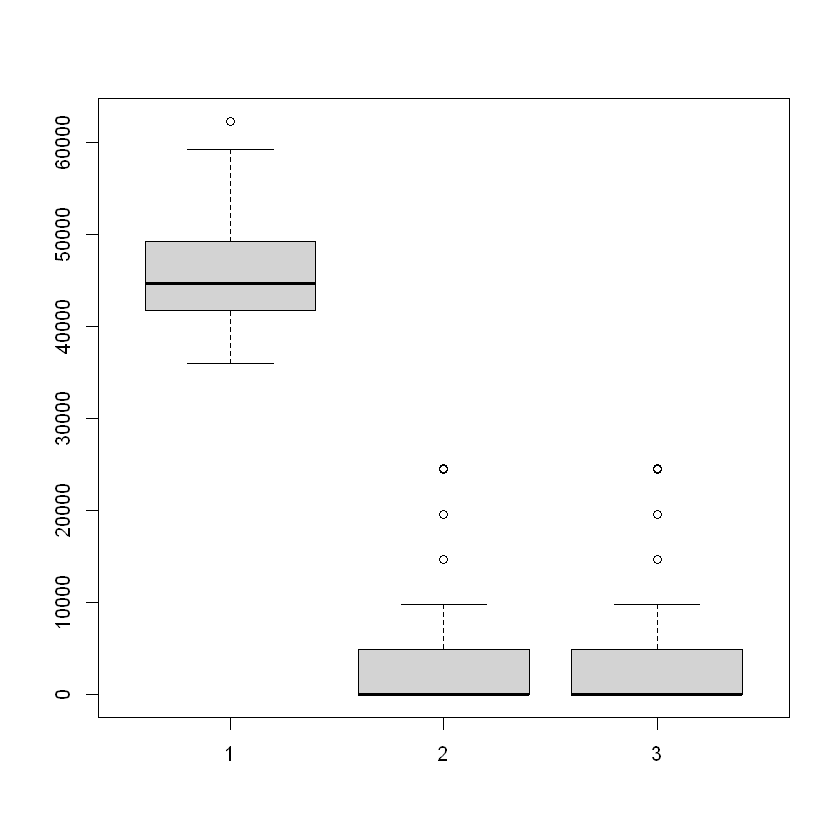

In [8]:
data_gen_tree<-function(n,mean_x,sd_x,mean_e,sd_e,beta){
  X_1<-rnorm(n,mean_x,sd_x)
  X_2<-rnorm(n,mean_x,sd_x)
  e<-rnorm(n,mean_e,sd_e)
  y<- -100*beta[1]*(X_1>=1) +100*beta[2]*(X_1<1) + e
  return(data.frame(X_1,X_2,y))
}

scores_a<-matrix(NA,3,100)

for (i in 1:100){


train<-data_gen_tree(n,mean_x,sd_x,mean_e,sd_e,beta)


test<-data_gen_tree(n,mean_x,sd_x,mean_e,sd_e,beta)


lm_obj<-lm(y~X_1 + X_2,train)


pruned_tree<-rpart(y~.,train,method='anova')


long_tree<-rpart(y~.,train,method='anova',control=list(cp=0))

scores_a[,i]<-c(mean_sqe(test,lm_obj),mean_sqe(test,pruned_tree),mean_sqe(test,long_tree))
}

print("means")
rowMeans(scores_a)
print("standard errors")
sqrt(diag(cov(t(scores_a))))

boxplot(t(scores_a))

### 2b A dgp well suited for the linear regression model

$$ y_i =  \beta_1 X_{1i} +  \beta_2 X_{2i} + e_i$$

[1] "means"


[1]   1.022074 103.509329 101.482140

[1] "standard deviation"


[1]  0.1550046 17.8988698 18.1280159

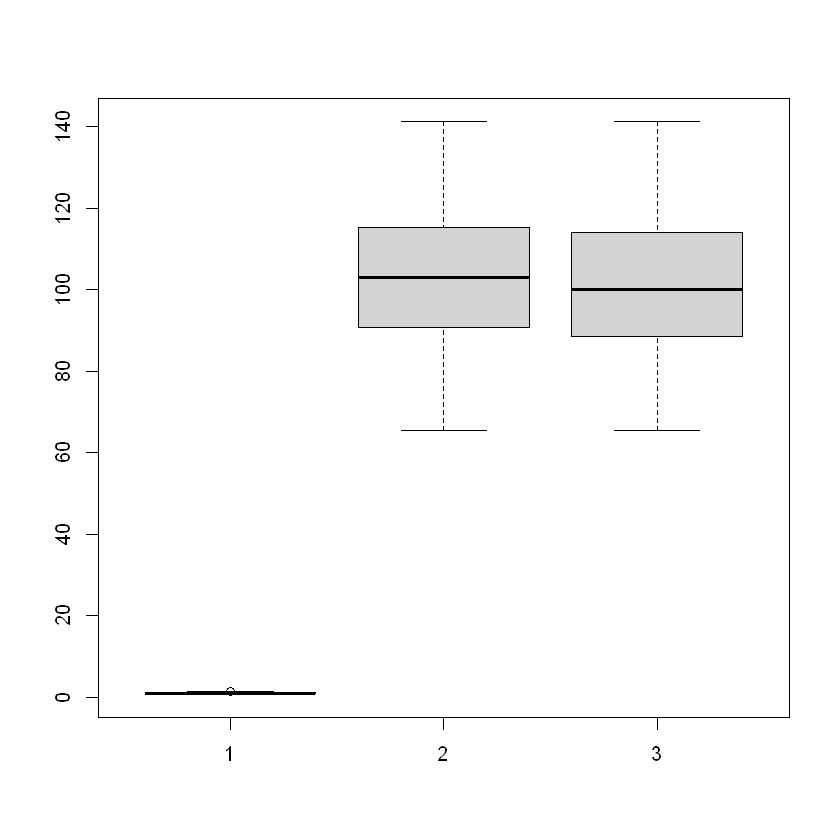

In [9]:

data_gen_lin<-function(n,mean_x,sd_x,mean_e,sd_e,beta){
  X_1<-rnorm(n,mean_x,sd_x)
  X_2<-rnorm(n,mean_x,sd_x)
  e<-rnorm(n,mean_e,sd_e)
  y<- beta[1]*X_1 + beta[2]*X_2 + e
  return(data.frame(X_1,X_2,y))
}

scores_b<-matrix(NA,3,100)

for (i in 1:100){

train<-data_gen_lin(n,mean_x,sd_x,mean_e,sd_e,beta)


test<-data_gen_lin(n,mean_x,sd_x,mean_e,sd_e,beta)


lm_obj<-lm(y~X_1 + X_2,train)


pruned_tree<-rpart(y~.,method='anova',train)


long_tree<-rpart(y~.,train,method='anova',control=list(cp=0))

scores_b[,i]<-c(mean_sqe(test,lm_obj),mean_sqe(test,pruned_tree),mean_sqe(test,long_tree))
}

print("means")
rowMeans(scores_b)
print("standard deviation")
sqrt(diag(cov(t(scores_b))))

boxplot(t(scores_b))


### 2c How does pruning reduce the variance?

,CP,nsplit
1,0.49734837,0
2,0.12544623,1
3,0.07433074,2
4,0.07058589,3
5,0.02632816,4
6,0.01782104,5
7,0.01732870,6
8,0.00000000,7


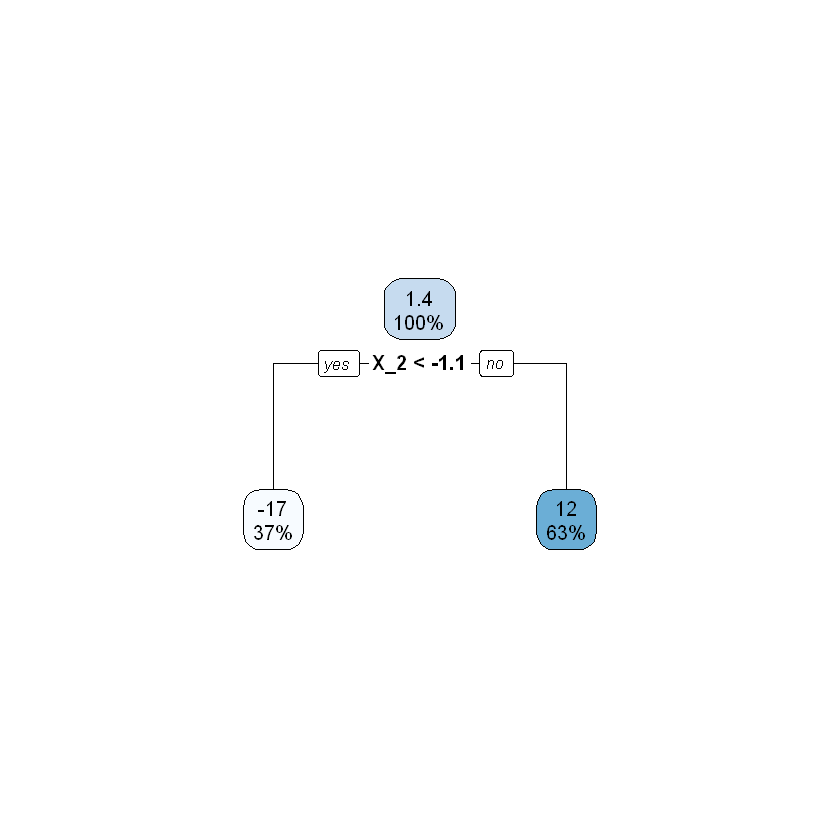

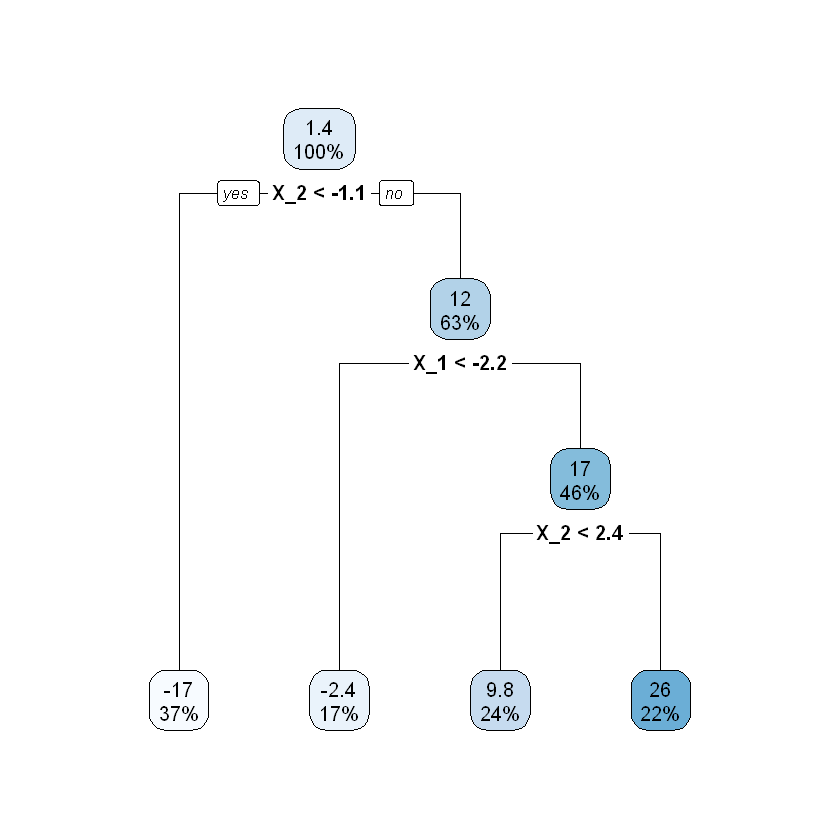

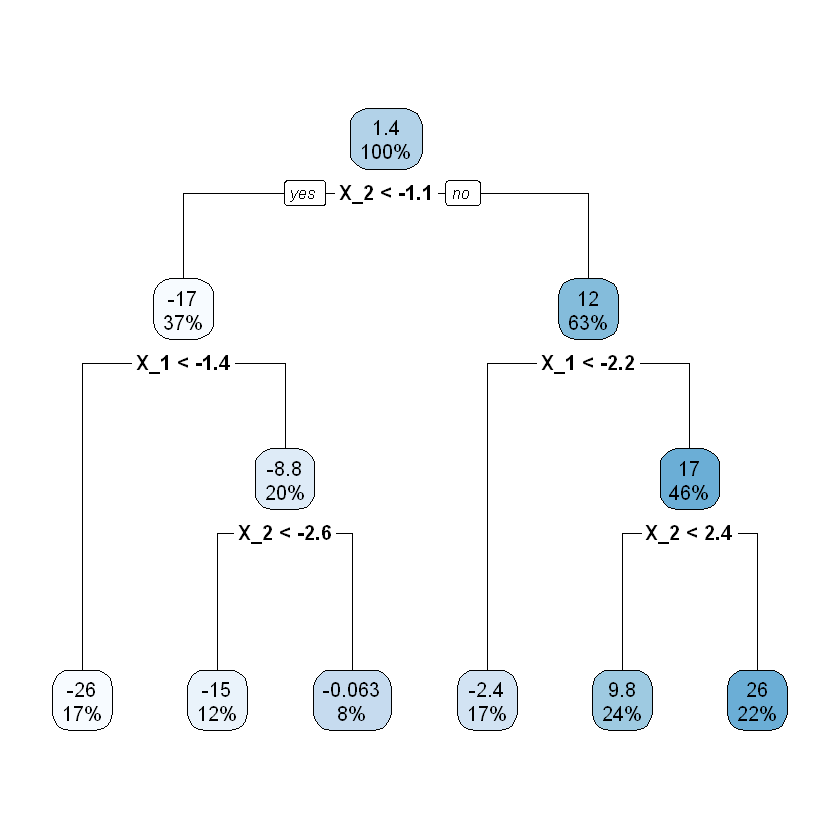

In [10]:
long_tree$cptable[,1:2]

cp_vals<-long_tree$cptable[,1]

rpart.plot(rpart(y~.,train,method='anova',control=list(cp=cp_vals[2])))


rpart.plot(rpart(y~.,train,method='anova',control=list(cp=cp_vals[4])))

rpart.plot(rpart(y~.,train,method='anova',control=list(cp=cp_vals[6])))

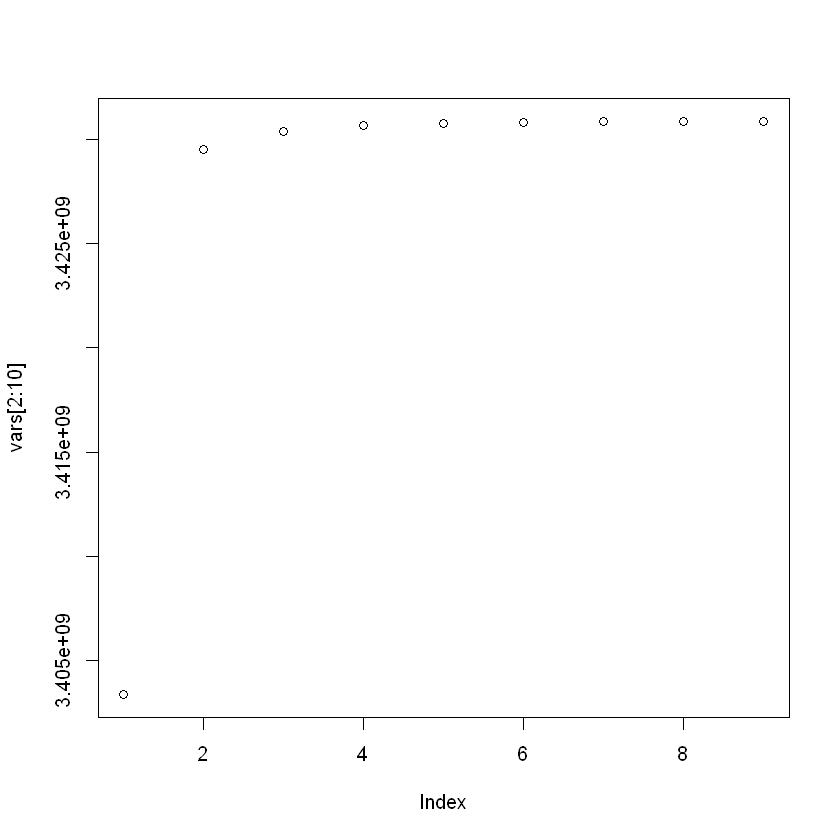

In [11]:
variances<-matrix(NA,10,100)

for (j in 1:100){

train<-data_gen(n,mean_x,sd_x,mean_e,sd_e,beta)
test<-data_gen(n,mean_x,sd_x,mean_e,sd_e,beta)

tree<-rpart(y~.,train,control=list(cp=0))

cp_vals<-tree$cptable[,1]

for (i in 1:10){
  
  
  model=rpart(y~., data=data, method='anova', control=list(cp=cp_vals[i])) 
  variances[i,j]<-(sd(predict(model,test)))^2
  
}
}
vars<-rowMeans(variances)
plot(vars[2:10])



- We can see that the higher the amount of splits (i.e. the less pruned a tree is) the higher the variance.
- This is because the more splits the higher the chance of overfitting.

Repeating Question 2b by putting more noise to the model as discussed at class

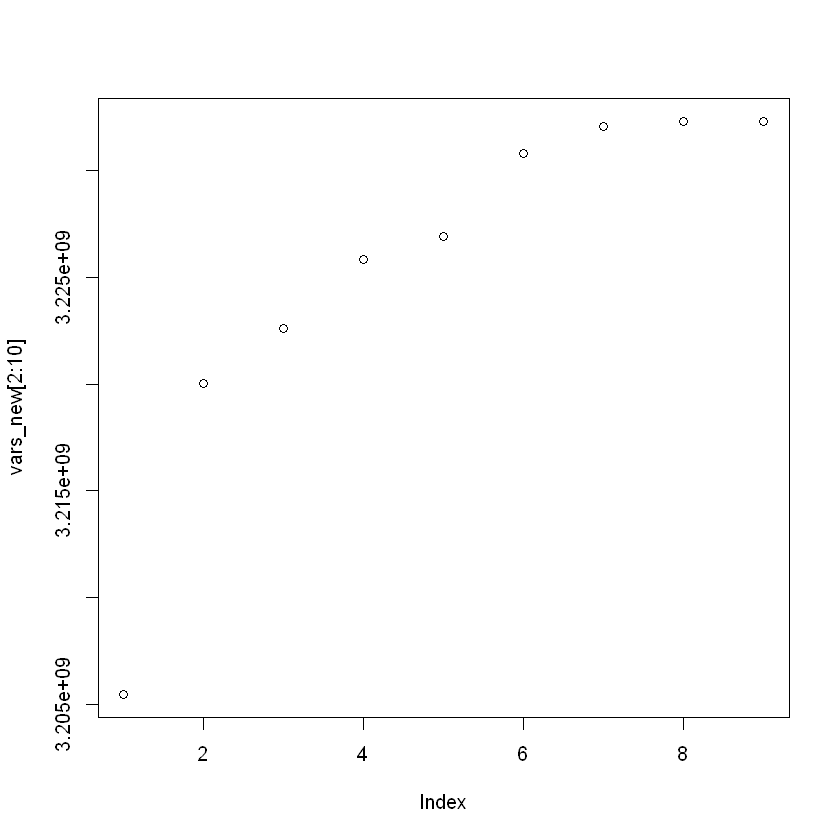

In [12]:
variances_new<-matrix(NA,10,100)

sd_e_new <- 10000 # very big standard error as the numbers of the model are very high

for (j in 1:100){
  
  train<-data_gen(n,mean_x,sd_x,mean_e,sd_e_new,beta)
  test<-data_gen(n,mean_x,sd_x,mean_e,sd_e_new,beta)
  
  tree<-rpart(y~.,train,control=list(cp=0))
  
  cp_vals<-tree$cptable[,1]
  
  for (i in 1:10){
    
    
    model=rpart(y~., data=data, method='anova', control=list(cp=cp_vals[i])) 
    variances_new[i,j]<-(sd(predict(model,test)))^2
    
  }
}
vars_new<-rowMeans(variances_new)
plot(vars_new[2:10])

It confirm our hypothesis that with more noise there is more benefits of pruning a tree